# Example with CopperMountain Model M5180 vector network analyzer

In [1]:
import qcodes as qc
from qcodes import Station, load_or_create_experiment, \
    initialise_database, Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.utils.dataset.doNd import do1d

In [2]:
from qcodes_contrib_drivers.drivers.CopperMountain.M5180 import M5180

## Connecting to device

- Install connection software S2VN, download here: https://coppermountaintech.com/download-free-vna-software-and-documentation/
- Run the software and go to System > Misc Setup > Network Remote Control Settings and turn on HiSLIP Server

In [3]:
vna = M5180(name='vna', address='TCPIP0::localhost::hislip0::INSTR')

Connected to: CMT C1209 (serial:, firmware:24.2.2/1) in 0.27s


In [4]:
# Let's look at all parameters
vna.print_readable_snapshot(update=True)

vna:
	parameter               value
--------------------------------------------------------------------------------
IDN                      :	{'vendor': 'CMT', 'model': 'C1209', 'serial': '', ...
averages                 :	1 
averages_enabled         :	False 
averages_trigger_enabled :	False 
center                   :	1.0005e+09 (Hz)
clock_source             :	INT 
data_transfer_format     :	ASC 
electrical_delay         :	0 (s)
electrical_distance      :	0 (m)
freq_seg                 :	+5.0000000000E+09,+5.0052631579E+09,+5.0105263158E...
if_bandwidth             :	10000 (Hz)
nb_traces                :	1 
npts                     :	2001 
output                   :	True 
point_check_sweep_first  :	True 
point_s11                :	Not available (('dB', 'rad'))
point_s11_iq             :	Not available (('V', 'V'))
point_s12                :	Not available (('dB', 'rad'))
point_s12_iq             :	Not available (('V', 'V'))
point_s21                :	Not available (('dB', 'rad'))
poin

# Setup db and station for test measurerment

In [5]:
# create an empty database based on the config file
qc.initialise_or_create_database_at('./test_copper_mountain.db')

In [6]:
exp = load_or_create_experiment(experiment_name='testing_coppermountain_driver',
                          sample_name="band_pass_filter")

In [7]:
station = qc.Station(vna)

## Measure a trace

In [8]:
# Turn on the RF output
vna.output('on')

Starting experimental run with id: 23. 


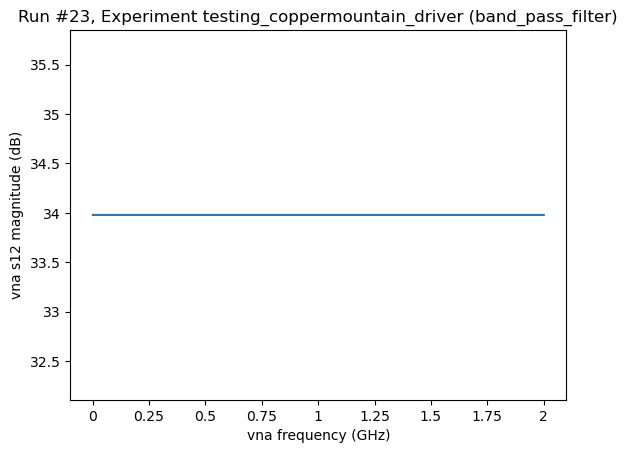

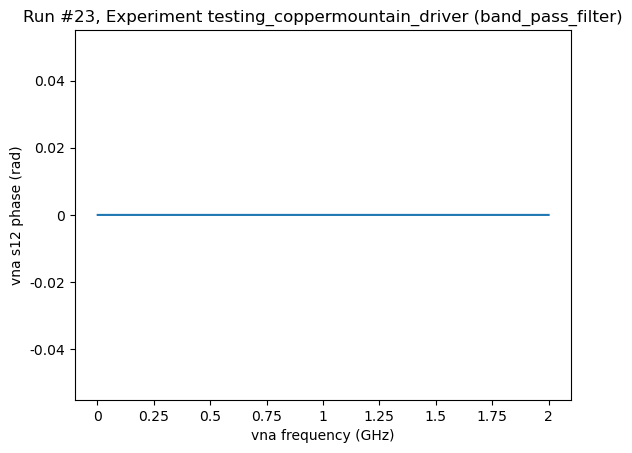

In [9]:
# define sweep parameters
vna.power(-20)
vna.start(1e6)
vna.stop(2e9)
vna.if_bandwidth(10e3)
vna.npts(2001)
vna.averages(1)
# do measurement
meas = Measurement()
meas.register_parameter(vna.s12)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12, vna.s12()))
ax, cbax = plot_by_id(datasaver.run_id)

In [10]:
# Similarly, other S-paramters can be queried
vna.s11()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [11]:
vna.s12()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [12]:
vna.s21()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [13]:
vna.s22()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [14]:
# or all S-parameters at once. Attention this is not a qcodes parameter
vna.get_s()

(array([1.0000000e+06, 1.9995000e+06, 2.9990000e+06, ..., 1.9980010e+09,
        1.9990005e+09, 2.0000000e+09]),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009]),
 array([0., 0., 0., ..., 0., 0., 0.]))

## Measure a segmented trace

In [15]:
# Turn on the RF output
vna.output('on')

In [16]:
# Write a Segments table
vna.freq_seg('SENSe1:SEGMent:DATA 5, 0, 1, 1, 0, 0, 2, 5e9, 5.1e9, 20, 1000, -20, 5.1e9, 5.3e9, 20, 1000, -20')

Starting experimental run with id: 24. 


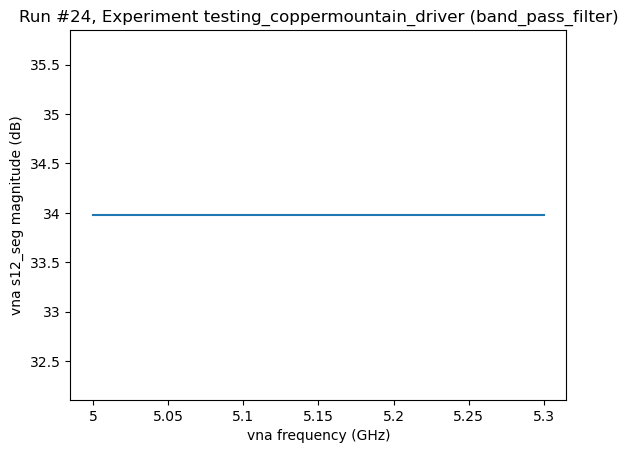

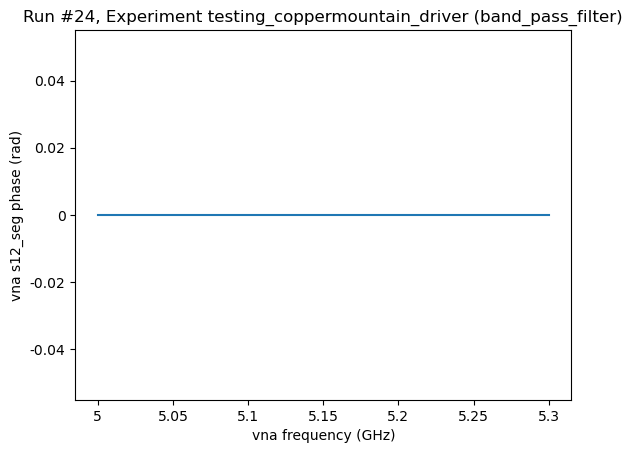

In [17]:
# Do measurement
meas = Measurement()
meas.register_parameter(vna.s12_seg)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12_seg, vna.s12_seg()))
ax, cbax = plot_by_id(datasaver.run_id)

In [18]:
vna.s21_seg()

(array([33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009,
        33.97940009, 33.97940009, 33.97940009, 33.97940009, 33.97940009]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]))

# Look at the names and the labels of the Sxx parameters

In [19]:
vna.s11.labels

('vna s11 magnitude', 'vna s11 phase')

In [20]:
vna.s11.names

('vna_s11_magnitude', 'vna_s11_phase')

In [21]:
vna.s11.setpoint_labels

(('vna frequency',), ('vna frequency',))

In [22]:
vna.s11.setpoint_names

(('vna_frequency',), ('vna_frequency',))

In [23]:
vna.s11_seg.labels

('vna s11_seg magnitude', 'vna s11_seg phase')

In [24]:
vna.s11_seg.names

('vna_s11_seg_magnitude', 'vna_s11_seg_phase')

In [25]:
vna.s11_seg.setpoint_labels

(('vna frequency',), ('vna frequency',))

In [26]:
vna.s11_seg.setpoint_names

(('vna_frequency',), ('vna_frequency',))